In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load in dataset
medicare_dataset = pd.read_csv('/kaggle/input/medicare-partd-opioid-prscribng-rate-by-geography/Medicare_Part_D_Opioid_Prescribing_Rates_by_Geograohy_2020.csv')
opioids_dataset = pd.read_csv('/kaggle/input/us-opiate-prescriptions/opioids.csv')
od_df = pd.read_csv('/kaggle/input/us-opiate-prescriptions/overdoses.csv')
prescribers_dataset = pd.read_csv('/kaggle/input/us-opiate-prescriptions/prescriber-info.csv')

In [2]:
opioids_dataset.shape

(113, 2)

In [3]:
# Shows us a part of the dataset 
medicare_dataset.head()

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2020,National,NaN,National,NaN,Totals,Overall,1254046.0,783760.0,63089468.0,1.495406e+09,4.22,-1.28,-0.19,6646202.0,10.53,-2.59,-0.49
1,2020,National,NaN,National,NaN,Rural/Urban,Rural,135604.0,93659.0,11144198.0,2.579450e+08,4.32,-1.39,-0.20,1085259.5,9.74,-2.78,-0.57
2,2020,National,NaN,National,NaN,Rural/Urban,Urban,1117120.0,689276.0,51908289.0,1.236576e+09,4.20,-1.25,-0.18,6225633.5,11.99,-2.19,-0.40
3,2020,State,1.0,Alabama,NaN,Totals,Overall,15802.0,9576.0,1745736.0,2.817864e+07,6.20,-1.35,-0.28,126040.0,7.22,-2.97,-0.41
4,2020,State,2.0,Alaska,NaN,Totals,Overall,2824.0,1810.0,80501.0,1.693029e+06,4.75,-2.06,-0.15,13323.0,16.55,-3.41,0.36


In [4]:
medicare_dataset.shape

(238869, 18)

In [5]:
# Shows me the coulmns and their names 
medicare_dataset.columns

Index(['Year', 'Prscrbr_Geo_Lvl', 'Prscrbr_Geo_Cd', 'Prscrbr_Geo_Desc',
       'RUCA_Cd', 'Breakout_Type', 'Breakout', 'Tot_Prscrbrs',
       'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms', 'Tot_Clms',
       'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_5Y_Chg',
       'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms',
       'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_5Y_Chg',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg'],
      dtype='object')

In [6]:
# Gives us the total number of features (variables) and data types
medicare_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            238869 non-null  int64  
 1   Prscrbr_Geo_Lvl                 238869 non-null  object 
 2   Prscrbr_Geo_Cd                  238845 non-null  float64
 3   Prscrbr_Geo_Desc                238869 non-null  object 
 4   RUCA_Cd                         161502 non-null  float64
 5   Breakout_Type                   238869 non-null  object 
 6   Breakout                        238869 non-null  object 
 7   Tot_Prscrbrs                    235282 non-null  float64
 8   Tot_Opioid_Prscrbrs             235282 non-null  float64
 9   Tot_Opioid_Clms                 224167 non-null  float64
 10  Tot_Clms                        235282 non-null  float64
 11  Opioid_Prscrbng_Rate            204815 non-null  float64
 12  Opioid_Prscrbng_

In [7]:
# Select the columns or features you want to copy over to the new dataset
columns_to_copy = ["Year","Prscrbr_Geo_Lvl","Prscrbr_Geo_Desc","Breakout_Type","Breakout","Tot_Prscrbrs", "Tot_Opioid_Clms","Tot_Clms","Tot_Opioid_Prscrbrs","Opioid_Prscrbng_Rate"]

# Create a new dataset with only the selected columns
new_md = medicare_dataset[columns_to_copy].copy()

# Export the new dataset to a CSV file
new_md.to_csv('new_dataset.csv', index=False)

# Delete rows in a certain category that contains a keyword, in this case: ZIP and County
new_md = new_md[new_md["Prscrbr_Geo_Lvl"].str.contains("ZIP") == False]
new_md = new_md[new_md["Prscrbr_Geo_Lvl"].str.contains("County") == False]

# drop rows where 'Opioid_Prscrbng_Rate' is 0 or empty
new_md =  new_md[new_md['Tot_Opioid_Clms'] != 0]
new_md = new_md[new_md['Tot_Opioid_Clms'].notna()]

# drop rows where 'LA_Opioid_Prscrbng_Rate' is 0 or empty
# new_md = new_md[new_md['LA_Opioid_Prscrbng_Rate'] != 0]
# new_md = new_md[new_md['LA_Opioid_Prscrbng_Rate'].notna()]

# Select only rows where the year is 2014
new_md = new_md.loc[new_md['Year'] == 2014]

# Shows the new dataset 
new_md.head()

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Desc,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Tot_Opioid_Prscrbrs,Opioid_Prscrbng_Rate
179574,2014,National,National,Totals,Overall,1071592.0,81027299.0,1.413018e+09,820680.0,5.73
179575,2014,National,National,Rural/Urban,Rural,119725.0,15794999.0,2.634746e+08,97548.0,5.99
179576,2014,National,National,Rural/Urban,Urban,950544.0,65183917.0,1.148626e+09,722136.0,5.67
179577,2014,State,Alabama,Totals,Overall,13089.0,2270603.0,2.882958e+07,10684.0,7.88
179578,2014,State,Alaska,Totals,Overall,2283.0,95773.0,1.386635e+06,1826.0,6.91


In [8]:
new_md.shape

(160, 10)

In [9]:
new_md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 179574 to 179740
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  160 non-null    int64  
 1   Prscrbr_Geo_Lvl       160 non-null    object 
 2   Prscrbr_Geo_Desc      160 non-null    object 
 3   Breakout_Type         160 non-null    object 
 4   Breakout              160 non-null    object 
 5   Tot_Prscrbrs          160 non-null    float64
 6   Tot_Opioid_Clms       160 non-null    float64
 7   Tot_Clms              160 non-null    float64
 8   Tot_Opioid_Prscrbrs   160 non-null    float64
 9   Opioid_Prscrbng_Rate  160 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 13.8+ KB


In [10]:
# Calculate the percentage of missing values for each column
missing_percentages = new_md.isna().mean() * 100

# Print the results
print('Percentage of missing values in each column:')
print(missing_percentages)

Percentage of missing values in each column:
Year                    0.0
Prscrbr_Geo_Lvl         0.0
Prscrbr_Geo_Desc        0.0
Breakout_Type           0.0
Breakout                0.0
Tot_Prscrbrs            0.0
Tot_Opioid_Clms         0.0
Tot_Clms                0.0
Tot_Opioid_Prscrbrs     0.0
Opioid_Prscrbng_Rate    0.0
dtype: float64


In [11]:
new_md.describe()

,Year,Tot_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Tot_Opioid_Prscrbrs,Opioid_Prscrbng_Rate
count,160.0,1.600000e+02,1.600000e+02,1.600000e+02,160.000000,160.000000
mean,2014.0,2.677326e+04,2.025078e+06,3.531398e+07,20504.550000,5.973312
std,0.0,1.132554e+05,8.255666e+06,1.446574e+08,86381.200701,1.317015
min,2014.0,3.100000e+01,2.770000e+02,9.529000e+03,17.000000,1.820000
25%,2014.0,2.494250e+03,1.989988e+05,3.439026e+06,1970.000000,5.237500
50%,2014.0,5.659000e+03,5.864855e+05,8.801930e+06,4624.000000,6.110000
75%,2014.0,1.896500e+04,1.463254e+06,2.390595e+07,15256.000000,6.817500
max,2014.0,1.071592e+06,8.102730e+07,1.413018e+09,820680.000000,8.370000


In [12]:
# This is when I wanted to focus on certain rows that were in a feature
state_df = new_md[new_md["Prscrbr_Geo_Lvl"] == "State"].copy()
state_df = new_md[new_md["Breakout"] == "Overall"].copy()

# # I wanted to drop these columns and I am focusing on the state's
state_df = state_df.drop(['Prscrbr_Geo_Lvl', 'Breakout_Type', 'Breakout'], axis=1)
state_df = state_df.drop([179574])
state_df
state_df.rename(columns={'Prscrbr_Geo_Desc': 'State'})
# state_df.info()

,Year,State,Tot_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Tot_Opioid_Prscrbrs,Opioid_Prscrbng_Rate
179577,2014,Alabama,13089.0,2270603.0,28829582.0,10684.0,7.88
179578,2014,Alaska,2283.0,95773.0,1386635.0,1826.0,6.91
179579,2014,Arizona,21092.0,1646396.0,23254986.0,16694.0,7.08
179580,2014,Arkansas,8006.0,1151549.0,17290721.0,6627.0,6.66
179581,2014,California,111344.0,7423383.0,134326584.0,83515.0,5.53
179582,2014,Colorado,18048.0,1170091.0,15644787.0,14373.0,7.48
179583,2014,Connecticut,16496.0,701833.0,15272110.0,12050.0,4.60
179584,2014,Delaware,3261.0,239439.0,3624130.0,2523.0,6.61
179585,2014,District of Columbia,4425.0,89579.0,1952862.0,3168.0,4.59
179586,2014,Florida,63137.0,5490224.0,103474592.0,46942.0,5.31


In [13]:
state_df.shape

(55, 7)

In [14]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 179577 to 179631
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  55 non-null     int64  
 1   Prscrbr_Geo_Desc      55 non-null     object 
 2   Tot_Prscrbrs          55 non-null     float64
 3   Tot_Opioid_Clms       55 non-null     float64
 4   Tot_Clms              55 non-null     float64
 5   Tot_Opioid_Prscrbrs   55 non-null     float64
 6   Opioid_Prscrbng_Rate  55 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.4+ KB


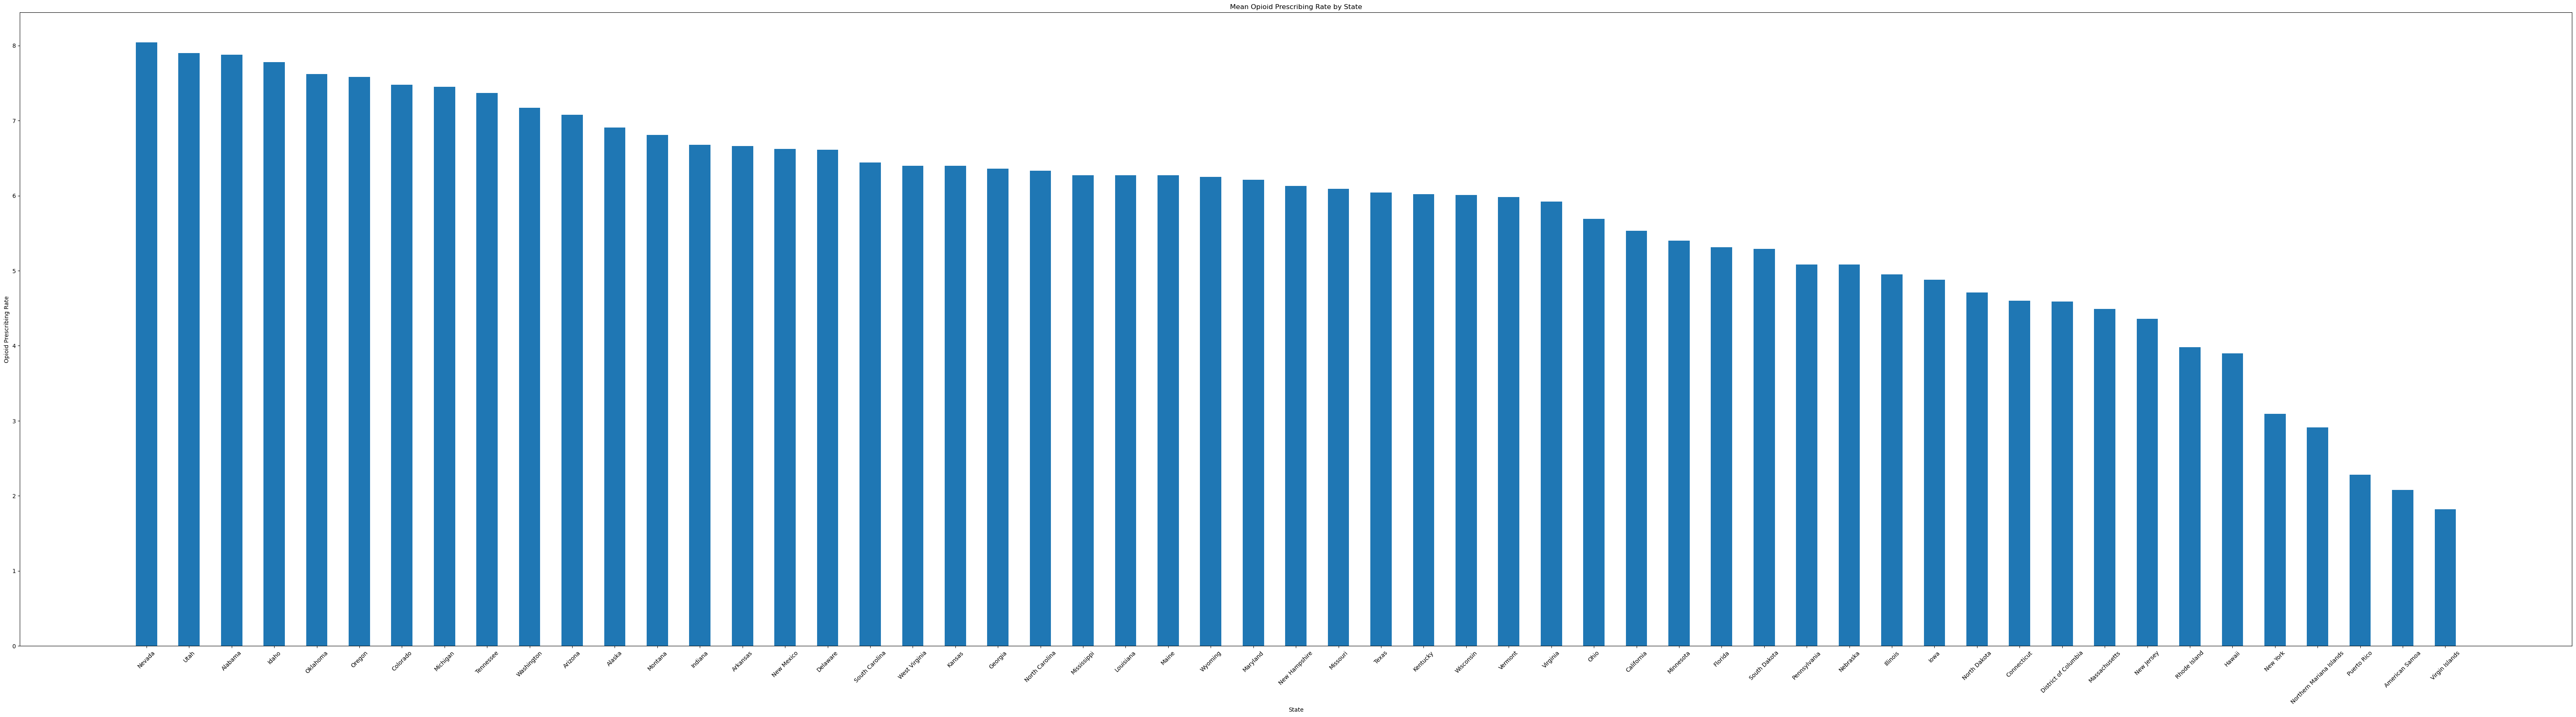

                          Opioid_Prscrbng_Rate
Prscrbr_Geo_Desc                              
Nevada                                    8.04
Utah                                      7.90
Alabama                                   7.88
Idaho                                     7.78
Oklahoma                                  7.62
Oregon                                    7.58
Colorado                                  7.48
Michigan                                  7.45
Tennessee                                 7.37
Washington                                7.17
Arizona                                   7.08
Alaska                                    6.91
Montana                                   6.81
Indiana                                   6.68
Arkansas                                  6.66
New Mexico                                6.62
Delaware                                  6.61
South Carolina                            6.44
West Virginia                             6.40
Kansas       

In [15]:
# This ranks the states in descending order for opioid prescribing rate

# Create a new dataframe with state and opioid prescribing rate columns
op_state_rates_df = state_df[['Prscrbr_Geo_Desc', 'Opioid_Prscrbng_Rate']]

# Group the dataframe by state and calculate the mean opioid prescribing rate
op_state_rates_mean = op_state_rates_df.groupby('Prscrbr_Geo_Desc').mean()

# Sort the states by their opioid prescribing rate in descending order
sorted_op_rates = op_state_rates_mean.sort_values('Opioid_Prscrbng_Rate', ascending=False)

# Create a bar plot of opioid prescribing rate by state
fig, ax = plt.subplots(figsize=(80, 20))  # set the figure size
ax.bar(sorted_op_rates.index, sorted_op_rates['Opioid_Prscrbng_Rate'], width=0.5)  # set the bar width

# Set the title and axis labels
plt.title('Mean Opioid Prescribing Rate by State')
plt.xlabel('State')
plt.ylabel('Opioid Prescribing Rate')

# Rotate the x-axis tick labels by 45 degrees
ax.tick_params(axis='x', labelrotation=45)

# Display the plot
plt.show()

print(sorted_op_rates)

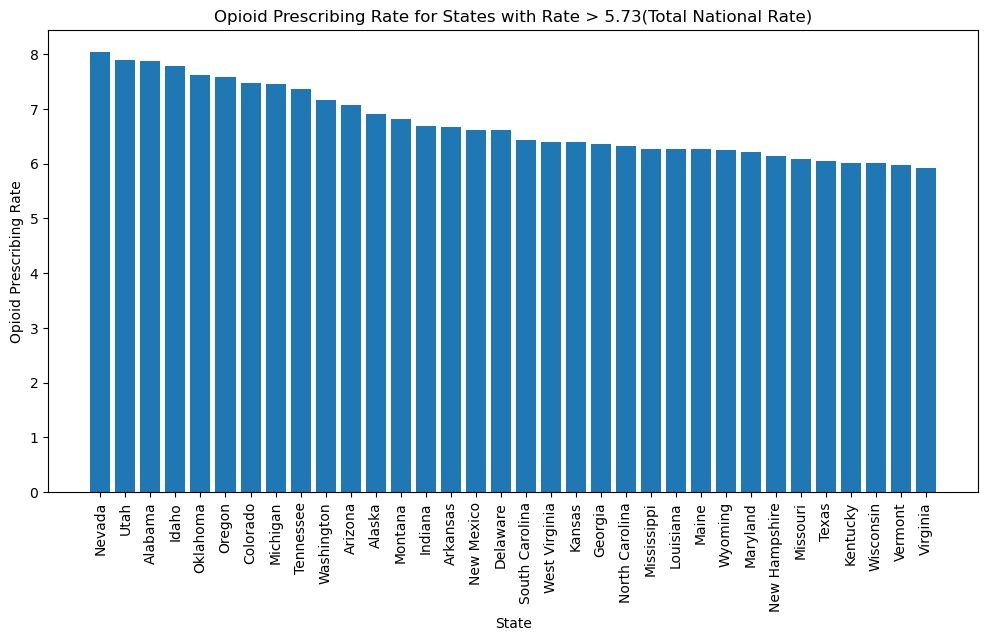

In [16]:
# Filter the DataFrame to include only states with opioid prescribing rate greater than 5.73
filtered_df = state_df[state_df['Opioid_Prscrbng_Rate'] > 5.73]

# Sort the filtered DataFrame by opioid prescribing rate in descending order
sorted_op_rates = filtered_df.sort_values('Opioid_Prscrbng_Rate', ascending=False)

# Create a bar plot for the filtered and sorted DataFrame
plt.figure(figsize=(12, 6))
plt.bar(sorted_op_rates['Prscrbr_Geo_Desc'], sorted_op_rates['Opioid_Prscrbng_Rate'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Opioid Prescribing Rate')
plt.title('Opioid Prescribing Rate for States with Rate > 5.73(Total National Rate)')
plt.show()

In [17]:
# calculate percentage of states with opioid prescribing rates over 5.73
num_states_over = len(state_df[state_df['Opioid_Prscrbng_Rate'] > 5.73])
total_states = len(state_df)
percent_over = (num_states_over / total_states) * 100

# print out percentage
print("Percentage of states with opioid prescribing rates over 5.73: {:.2f}%".format(percent_over))

# The results show that 61.82% of state's for the year 2014
# had more than the national level, which means 34 out of the 54

Percentage of states with opioid prescribing rates over 5.73: 61.82%


In [18]:
od_df 

,State,Population,Deaths,Abbrev
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA
5,Colorado,"5,268,367",899,CO
6,Connecticut,"3,596,080",623,CT
7,Delaware,"925,749",189,DE
8,Florida,"19,552,860","2,634",FL
9,Georgia,"9,992,167","1,206",GA


In [19]:
# Convert the 'Population' column to an integer data type
od_df['Population'] = od_df['Population'].str.replace(',', '').astype(float)

# Convert the 'Deaths' column to an integer data type
od_df['Deaths'] = od_df['Deaths'].str.replace(',', '').astype(float)
# od_df.info()
od_df.describe()

,Population,Deaths
count,5.000000e+01,50.000000
mean,6.309648e+06,939.180000
std,7.061295e+06,898.195486
min,5.826580e+05,43.000000
25%,1.857857e+06,281.000000
50%,4.510382e+06,712.000000
75%,6.901760e+06,1209.750000
max,3.833252e+07,4521.000000


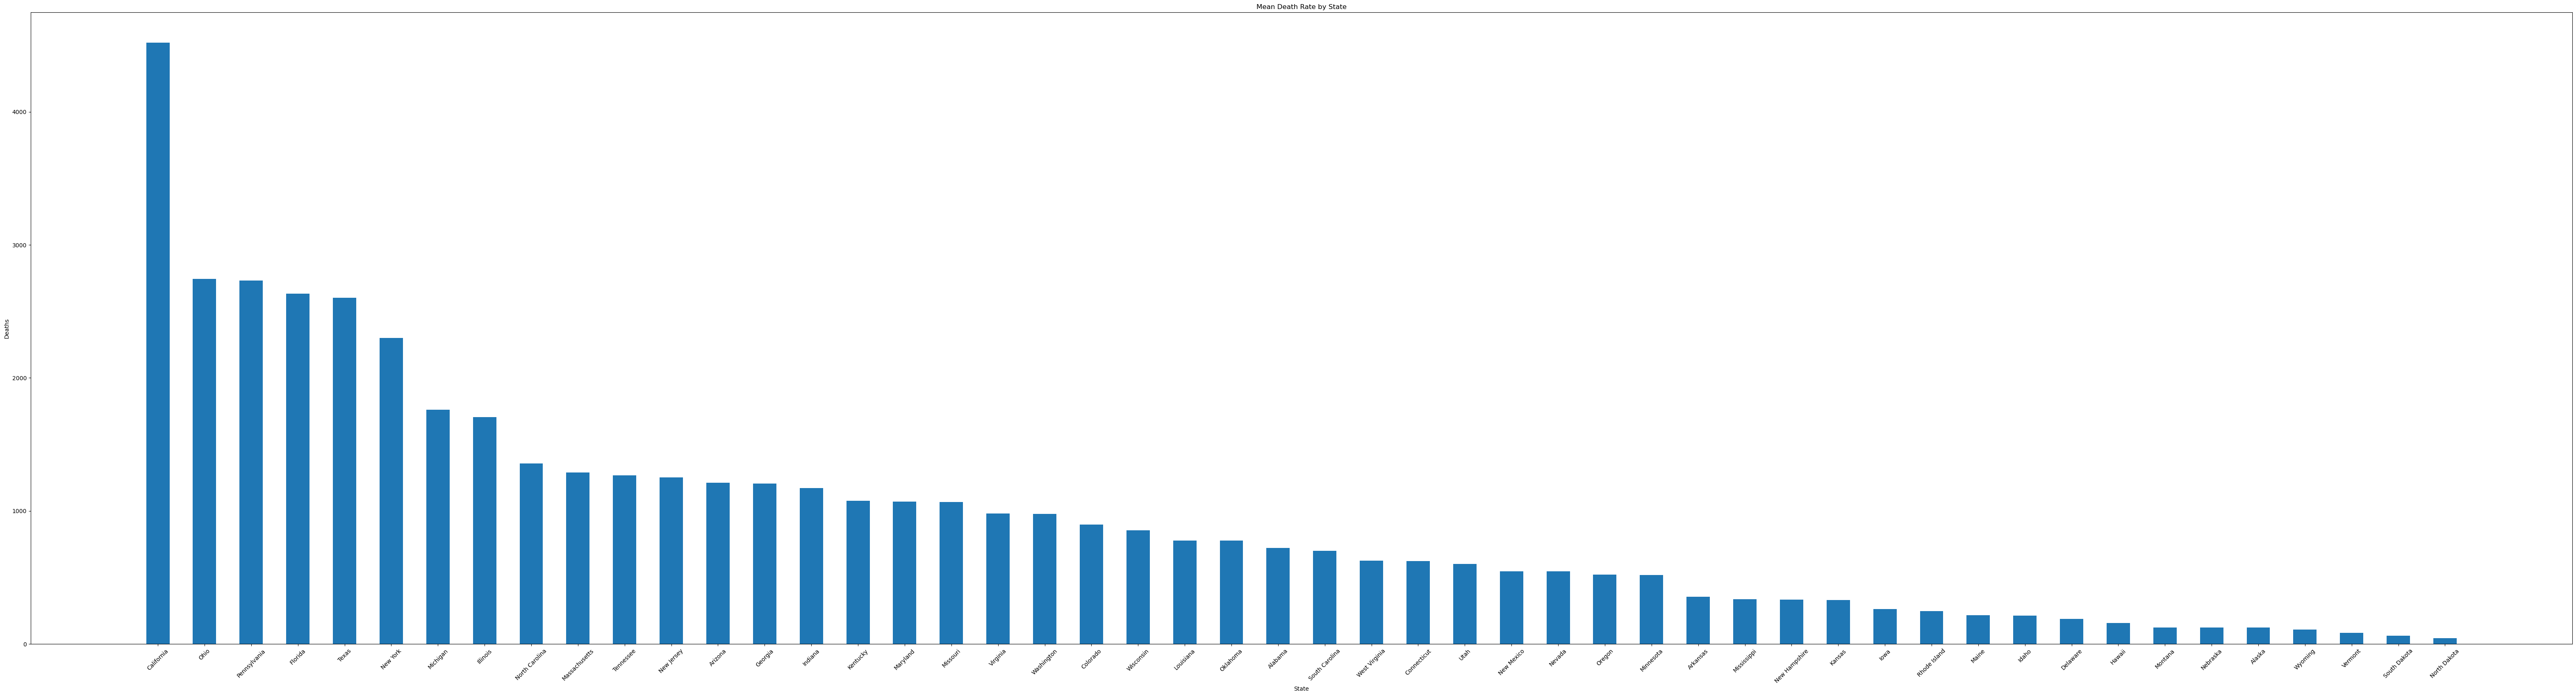

                Deaths
State                 
California      4521.0
Ohio            2744.0
Pennsylvania    2732.0
Florida         2634.0
Texas           2601.0
New York        2300.0
Michigan        1762.0
Illinois        1705.0
North Carolina  1358.0
Massachusetts   1289.0
Tennessee       1269.0
New Jersey      1253.0
Arizona         1211.0
Georgia         1206.0
Indiana         1172.0
Kentucky        1077.0
Maryland        1070.0
Missouri        1067.0
Virginia         980.0
Washington       979.0
Colorado         899.0
Wisconsin        853.0
Louisiana        777.0
Oklahoma         777.0
Alabama          723.0
South Carolina   701.0
West Virginia    627.0
Connecticut      623.0
Utah             603.0
New Mexico       547.0
Nevada           545.0
Oregon           522.0
Minnesota        517.0
Arkansas         356.0
Mississippi      336.0
New Hampshire    334.0
Kansas           332.0
Iowa             264.0
Rhode Island     247.0
Maine            216.0
Idaho            212.0
Delaware   

In [20]:
# This gets the opioid death to population ratio
od_df['ratio'] = od_df['Deaths'] / od_df['Population']

# Creates a new dataframe with the State and Death column 
od_state_rates = od_df[['State', 'Deaths']]

# Groups states by it's average and ranks Deaths in descending order
od_state_rates_mean = od_state_rates.groupby('State').mean()
sorted_od_rates = od_state_rates_mean.sort_values('Deaths', ascending=False)

# Creates a bar plot for deaths by state
fig, ax = plt.subplots(figsize=(80,20))
ax.bar(sorted_od_rates.index, sorted_od_rates['Deaths'], width=0.5) # sets the bar width

# Set the title and axis labels
plt.title('Mean Death Rate by State')
plt.xlabel('State')
plt.ylabel('Deaths')

# Rotates the x-axis tick labels by 45 degrees
ax.tick_params(axis='x', labelrotation=45)

# Displays the plot
plt.show()

# Prints out the sorted overdose death rate 
print(sorted_od_rates)

In [21]:
total_deaths = od_df['Deaths'].sum()
print("Total deaths: ", total_deaths)

Total deaths:  46959.0


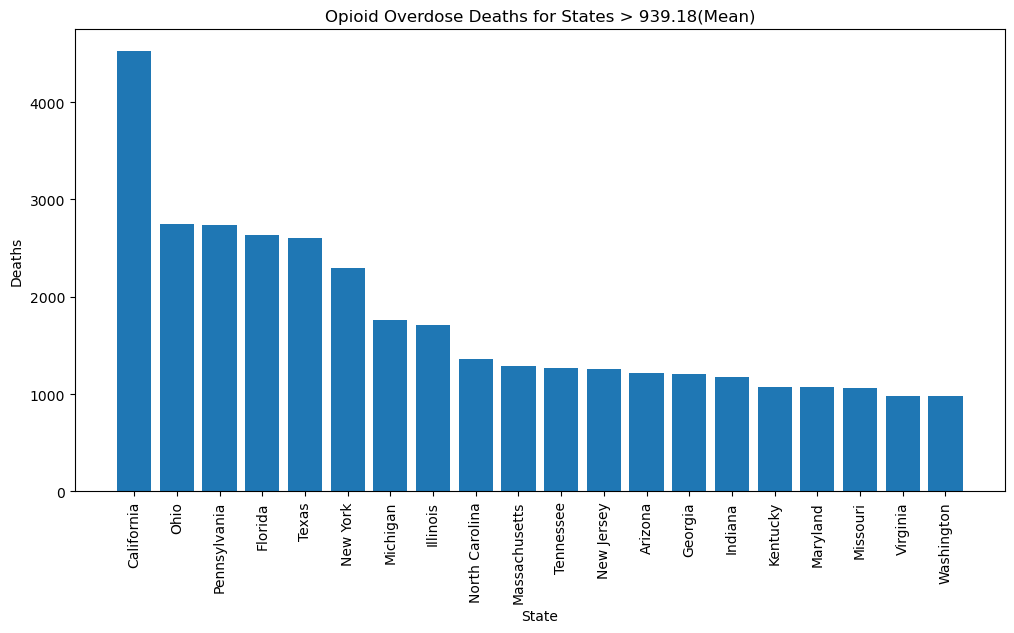

In [22]:
# Filters all states over National rate of opioid overdose deaths
od_filtered_df = od_df[od_df['Deaths'] > 939.18]

# Create a bar plot for the filtered and sorted DataFrame
sorted_od_rates = od_filtered_df.sort_values('Deaths', ascending=False)
plt.figure(figsize=(12,6))
plt.bar(sorted_od_rates['State'], sorted_od_rates['Deaths'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Deaths')
plt.title('Opioid Overdose Deaths for States > 939.18(Mean)')
plt.show()

In [23]:
# Calculating percentage of states with deaths over 939.18 which is the National Rate
num_states_over = len(od_df[od_df['Deaths'] > 939.18])
total_states = len(od_df)
percent_over = (num_states_over / total_states) * 100

# print out percentage
print("Percentage of states with deaths over 939.18(Mean): {:.2f}%".format(percent_over))

# The rate means that 20/50 states have a death over the National Rate

Percentage of states with deaths over 939.18(Mean): 40.00%


In [24]:
prescribers_dataset.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [25]:
prescribers_dataset.describe()

,NPI,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1.498162e+09,3.157160,2.370400,1.05368,7.041000,0.708440,8.962840,9.305720,16.12812,2.394840,...,2.18804,2.238160,2.551600,0.806240,19.198040,3.348240,4.070880,1.119440,11.573120,0.587520
std,2.877233e+08,20.755819,11.631601,6.66110,25.898648,5.224049,36.520987,29.375476,69.35317,14.266314,...,10.08554,13.325884,23.327117,4.951929,86.501125,17.127556,18.467437,10.299475,39.136616,0.492291
min,1.003002e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.245473e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.497842e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.740406e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.992999e+09,770.000000,644.000000,356.00000,1105.000000,275.000000,2431.000000,790.000000,5716.00000,596.000000,...,528.00000,902.000000,1814.000000,143.000000,6029.000000,596.000000,772.000000,694.000000,2107.000000,1.000000


In [26]:
all_opioids = list(re.sub(r'[-\s]','.',x) for x in opioids_dataset.values[:,0])
prescribed_ops = list(set(all_opioids) & set(prescribers_dataset.columns))

for i,drug in enumerate(prescribed_ops):
    print (i+1,drug)

1 METHADONE.HCL
2 OXYCODONE.HCL
3 HYDROCODONE.ACETAMINOPHEN
4 MORPHINE.SULFATE.ER
5 OXYCODONE.ACETAMINOPHEN
6 MORPHINE.SULFATE
7 TRAMADOL.HCL
8 FENTANYL
9 OXYCONTIN
10 HYDROMORPHONE.HCL
11 ACETAMINOPHEN.CODEINE


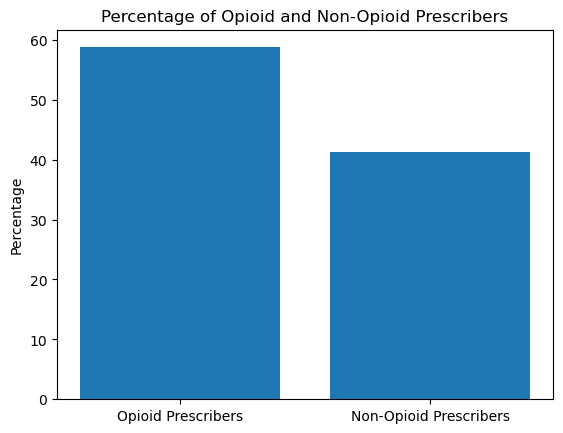

In [27]:
# group the data by 'Opioid.Prescriber' column and count the number of unique NPIs
opioid_counts = prescribers_dataset.groupby('Opioid.Prescriber')['NPI'].nunique()

# calculate the percentage of prescribers who have a 1 to those that have a 0
percentage_opioid_prescribers = opioid_counts[1] / (opioid_counts[1] + opioid_counts[0]) * 100
percentage_non_opioid_prescribers = opioid_counts[0] / (opioid_counts[1] + opioid_counts[0]) * 100

# create a bar plot
plt.bar(['Opioid Prescribers', 'Non-Opioid Prescribers'], [percentage_opioid_prescribers, percentage_non_opioid_prescribers])
plt.title('Percentage of Opioid and Non-Opioid Prescribers')
plt.ylabel('Percentage')
plt.show()

In [28]:
total_prescribers = len(prescribers_dataset['NPI'].unique())  # total number of prescribers
total_opioid_prescribers = len(prescribers_dataset[prescribers_dataset['Opioid.Prescriber'] == 1]['NPI'].unique())  # total number of prescribers who prescribed opioids
percentage_opioid_prescribers = (total_opioid_prescribers / total_prescribers) * 100  # percentage of prescribers who prescribed opioids

print(f"Percentage of prescribers who prescribed opioids: {percentage_opioid_prescribers:.2f}%")

Percentage of prescribers who prescribed opioids: 58.75%


In [29]:
columns_to_copy = ['NPI', 'Gender', 'State', 'Credentials', 'Specialty', 'OXYCODONE.ACETAMINOPHEN','FENTANYL','HYDROMORPHONE.HCL','HYDROCODONE.ACETAMINOPHEN','MORPHINE.SULFATE','METHADONE.HCL', 'MORPHINE.SULFATE.ER','OXYCODONE.HCL','ACETAMINOPHEN.CODEINE', 'TRAMADOL.HCL','OXYCONTIN','Opioid.Prescriber']
new_prescribers = prescribers_dataset[columns_to_copy].copy()
new_prescribers.shape
new_prescribers

,NPI,Gender,State,Credentials,Specialty,OXYCODONE.ACETAMINOPHEN,FENTANYL,HYDROMORPHONE.HCL,HYDROCODONE.ACETAMINOPHEN,MORPHINE.SULFATE,METHADONE.HCL,MORPHINE.SULFATE.ER,OXYCODONE.HCL,ACETAMINOPHEN.CODEINE,TRAMADOL.HCL,OXYCONTIN,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,17,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,33,0,0,182,0,0,24,87,0,36,0,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,0,0,0,0,0,0,0
3,1669567541,M,AZ,MD,Internal Medicine,229,0,0,0,22,0,146,29,43,90,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,22,0,22,0,0,0,22,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1619019353,F,WA,M.D.,Family Practice,19,0,0,40,0,0,0,21,12,0,0,1
24996,1780693671,F,MI,DO,Internal Medicine,0,0,0,58,0,0,0,0,15,29,0,1
24997,1346270956,M,AZ,MD,Emergency Medicine,0,0,0,42,0,0,0,0,0,0,0,1
24998,1023116514,F,IN,M.D.,Family Practice,0,0,0,0,0,0,0,0,0,0,0,1


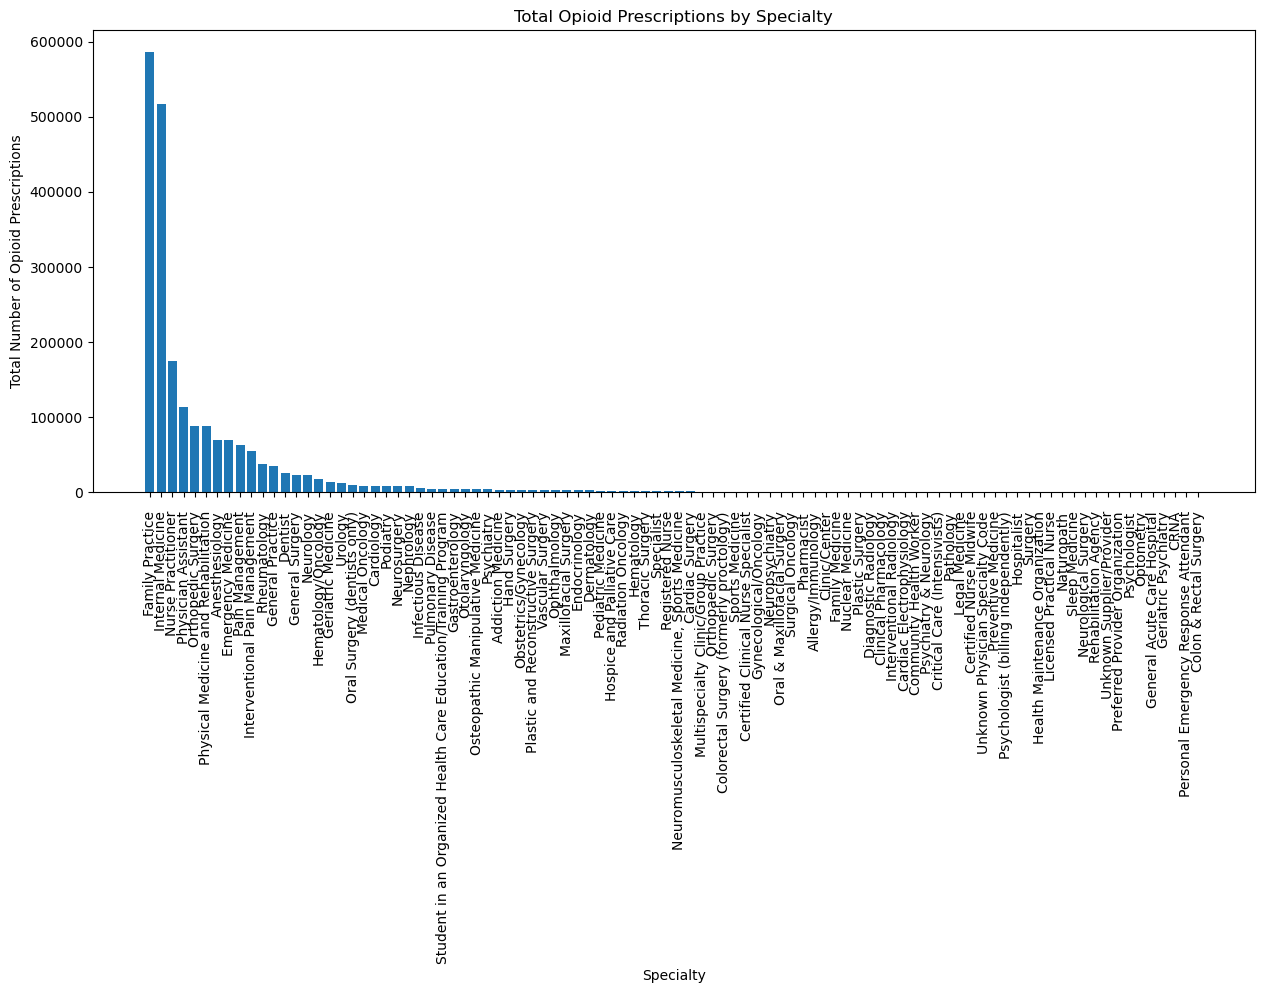

In [30]:
# Create a new DataFrame with only opioid prescribers
opioid_prescribers = new_prescribers[new_prescribers['Opioid.Prescriber'] == 1]

# Group the data by Specialty and sum the values for each drug column
grouped_df = opioid_prescribers.groupby('Specialty')[['OXYCODONE.ACETAMINOPHEN','FENTANYL','HYDROMORPHONE.HCL','HYDROCODONE.ACETAMINOPHEN','MORPHINE.SULFATE','METHADONE.HCL', 'MORPHINE.SULFATE.ER','OXYCODONE.HCL','ACETAMINOPHEN.CODEINE', 'TRAMADOL.HCL','OXYCONTIN']].sum()

# Create a new column that is the sum of all drug columns
grouped_df['Total Opioids'] = grouped_df.sum(axis=1)

# Sort the values in descending order by 'Total Opioids'
grouped_df = grouped_df.sort_values(by='Total Opioids', ascending=False)

plt.figure(figsize=(15,6))
plt.bar(range(len(grouped_df)), grouped_df['Total Opioids'])
plt.xticks(range(len(grouped_df)), grouped_df.index, rotation=90)
plt.tick_params(axis='x', which='major', pad=10)
plt.xlabel('Specialty')
plt.ylabel('Total Number of Opioid Prescriptions')
plt.title('Total Opioid Prescriptions by Specialty')
plt.show()

In [31]:
# Sum the opioid prescriptions by specialty
grouped_df = opioid_prescribers.groupby('Specialty')[['OXYCODONE.ACETAMINOPHEN','FENTANYL','HYDROMORPHONE.HCL','HYDROCODONE.ACETAMINOPHEN','MORPHINE.SULFATE','METHADONE.HCL', 'MORPHINE.SULFATE.ER','OXYCODONE.HCL','ACETAMINOPHEN.CODEINE', 'TRAMADOL.HCL','OXYCONTIN',]].sum()

# Sort the specialties in descending order by total opioid prescriptions
sorted_specialties = grouped_df.sum(axis=1).sort_values(ascending=False).index

# Create a list with the specialties and their total opioid prescriptions in descending order
specialties_list = []
for specialty in sorted_specialties:
    total_opioids = grouped_df.loc[specialty].sum()
    specialties_list.append((specialty, total_opioids))

# Print the list
for rank, (specialty, total_opioids) in enumerate(specialties_list, 1):
    print(f'{rank}. {specialty}: {total_opioids}')


1. Family Practice: 585923
2. Internal Medicine: 517066
3. Nurse Practitioner: 174306
4. Physician Assistant: 113043
5. Orthopedic Surgery: 88301
6. Physical Medicine and Rehabilitation: 88030
7. Anesthesiology: 70036
8. Emergency Medicine: 69579
9. Pain Management: 62425
10. Interventional Pain Management: 55140
11. Rheumatology: 37427
12. General Practice: 35082
13. Dentist: 25351
14. General Surgery: 23219
15. Neurology: 22417
16. Hematology/Oncology: 17362
17. Geriatric Medicine: 14102
18. Urology: 12444
19. Oral Surgery (dentists only): 9900
20. Medical Oncology: 8851
21. Cardiology: 8758
22. Podiatry: 8745
23. Neurosurgery: 8411
24. Nephrology: 7694
25. Infectious Disease: 5918
26. Pulmonary Disease: 4829
27. Student in an Organized Health Care Education/Training Program: 4418
28. Gastroenterology: 4203
29. Otolaryngology: 4060
30. Osteopathic Manipulative Medicine: 3847
31. Psychiatry: 3790
32. Addiction Medicine: 3501
33. Hand Surgery: 3450
34. Obstetrics/Gynecology: 3214
35. P

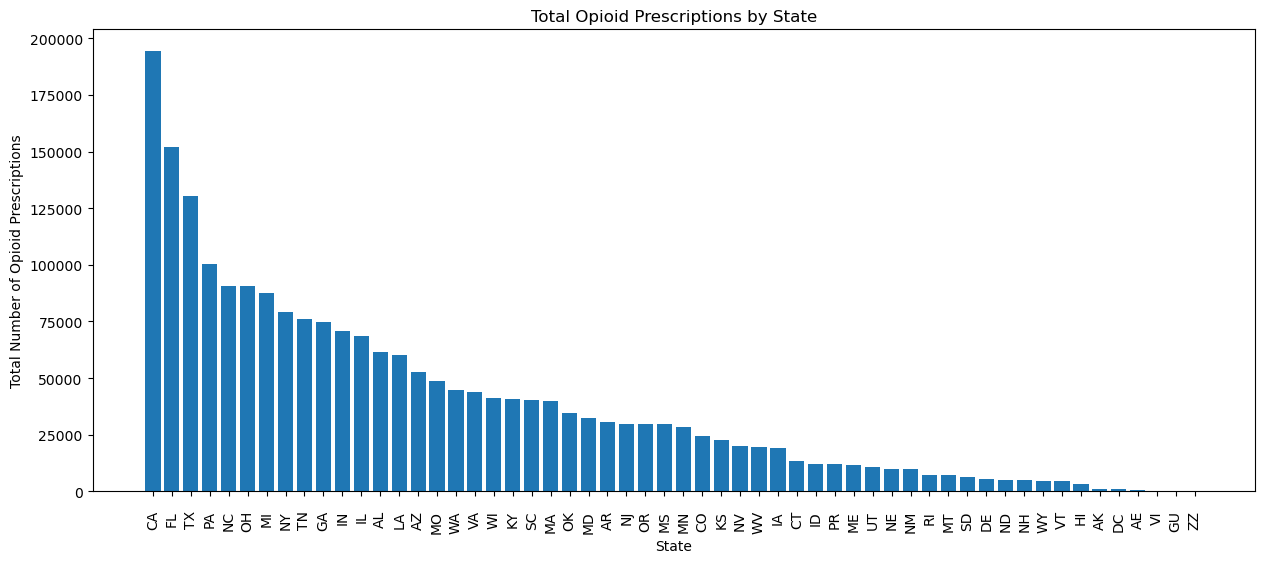

In [32]:
# Group the data by State and sum the values for each drug column
op_state_df = opioid_prescribers.groupby('State')[['OXYCODONE.ACETAMINOPHEN','FENTANYL','HYDROMORPHONE.HCL','HYDROCODONE.ACETAMINOPHEN','MORPHINE.SULFATE','METHADONE.HCL', 'MORPHINE.SULFATE.ER','OXYCODONE.HCL','ACETAMINOPHEN.CODEINE', 'TRAMADOL.HCL','OXYCONTIN']].sum()

# Create a new column that is the sum of all drug columns
op_state_df['Total Opioids'] = op_state_df.sum(axis=1)

# Sort the values in descending order by 'Total Opioids'
op_state_df = op_state_df.sort_values(by='Total Opioids', ascending=False)

plt.figure(figsize=(15,6))
plt.bar(range(len(op_state_df)), op_state_df['Total Opioids'])
plt.xticks(range(len(op_state_df)), op_state_df.index, rotation=90)
plt.tick_params(axis='x', which='major', pad=10)
plt.xlabel('State')
plt.ylabel('Total Number of Opioid Prescriptions')
plt.title('Total Opioid Prescriptions by State')
plt.show()

In [33]:
# Sort the statest in descending order by total opioid prescriptions
sorted_op_states = op_state_df.sum(axis=1).sort_values(ascending=False).index

# Create a list with the specialties and their total opioid prescriptions in descending order
states_list = []
for state in sorted_op_states:
    total_opioids = op_state_df.loc[state].sum()
    states_list.append((state, total_opioids))
    
# Print the list
for rank, (state, total_opioids) in enumerate(states_list, 1):
    print(f'{rank}. {state}: {total_opioids}')

1. CA: 388300
2. FL: 304342
3. TX: 261058
4. PA: 200724
5. NC: 181488
6. OH: 181322
7. MI: 175320
8. NY: 158462
9. TN: 151926
10. GA: 149754
11. IN: 141498
12. IL: 136898
13. AL: 122718
14. LA: 120814
15. AZ: 105420
16. MO: 97648
17. WA: 89198
18. VA: 87682
19. WI: 82346
20. KY: 81426
21. SC: 80860
22. MA: 79986
23. OK: 69356
24. MD: 65016
25. AR: 61642
26. NJ: 59696
27. OR: 59540
28. MS: 59506
29. MN: 57222
30. CO: 48656
31. KS: 45692
32. NV: 39754
33. WV: 39486
34. IA: 38508
35. CT: 26618
36. ID: 24180
37. PR: 24072
38. ME: 23180
39. UT: 21588
40. NE: 20210
41. NM: 19760
42. RI: 14502
43. MT: 14310
44. SD: 12342
45. DE: 11054
46. ND: 9860
47. NH: 9664
48. WY: 9248
49. VT: 9072
50. HI: 6690
51. AK: 2512
52. DC: 1918
53. AE: 926
54. VI: 398
55. GU: 34
56. ZZ: 24


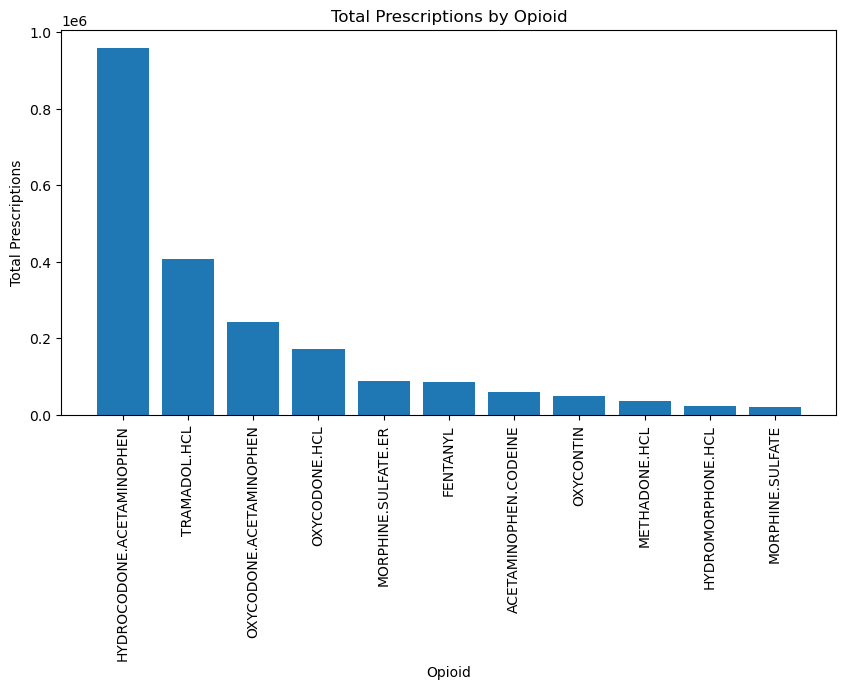

HYDROCODONE.ACETAMINOPHEN    958082
TRAMADOL.HCL                 406693
OXYCODONE.ACETAMINOPHEN      242914
OXYCODONE.HCL                172411
MORPHINE.SULFATE.ER           88305
FENTANYL                      85443
ACETAMINOPHEN.CODEINE         59260
OXYCONTIN                     49872
METHADONE.HCL                 35818
HYDROMORPHONE.HCL             23177
MORPHINE.SULFATE              20738
dtype: int64


In [34]:
opioid_totals = new_prescribers[['OXYCODONE.ACETAMINOPHEN','FENTANYL','HYDROMORPHONE.HCL','HYDROCODONE.ACETAMINOPHEN','MORPHINE.SULFATE','METHADONE.HCL', 'MORPHINE.SULFATE.ER','OXYCODONE.HCL','ACETAMINOPHEN.CODEINE', 'TRAMADOL.HCL','OXYCONTIN']].sum()
opioid_totals.sort_values(ascending=False, inplace=True)

# create bar plot
plt.figure(figsize=(10,5))
plt.bar(opioid_totals.index, opioid_totals.values)
plt.xticks(rotation=90)
plt.xlabel('Opioid')
plt.ylabel('Total Prescriptions')
plt.title('Total Prescriptions by Opioid')
plt.show()
print(opioid_totals)

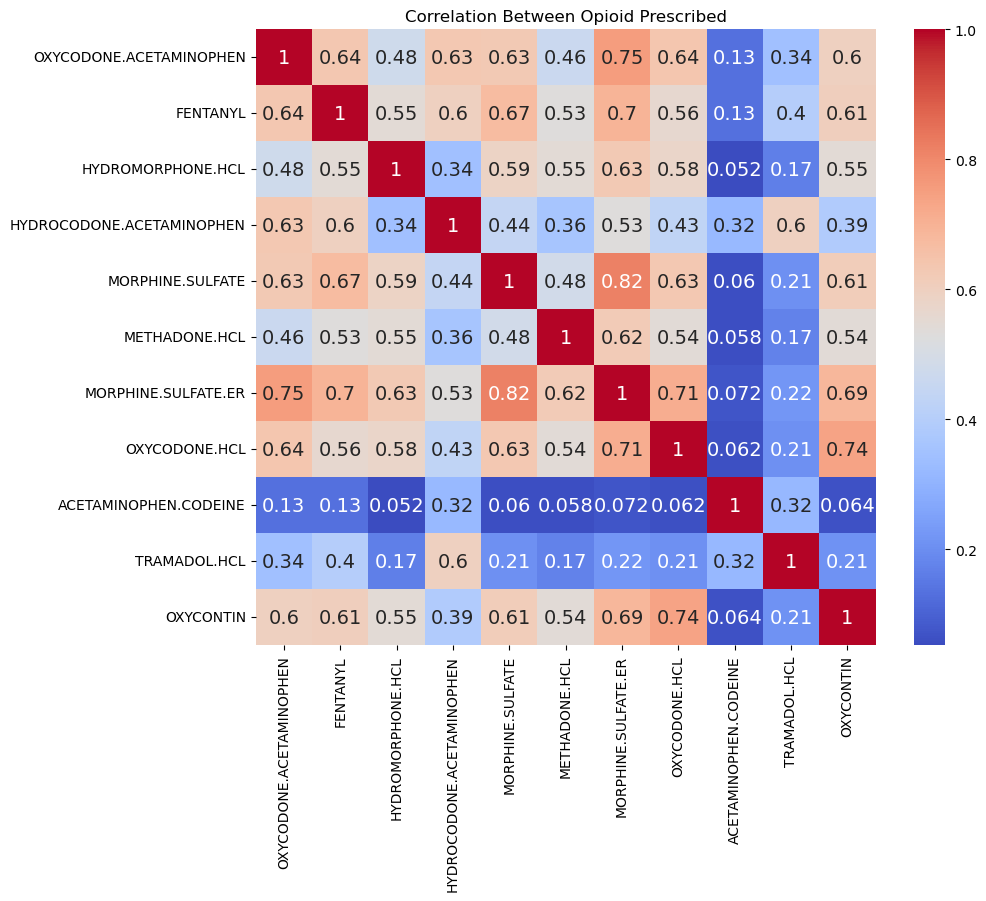

In [35]:
# Generate the correlation matrix
opioid_df = new_prescribers[['OXYCODONE.ACETAMINOPHEN','FENTANYL','HYDROMORPHONE.HCL','HYDROCODONE.ACETAMINOPHEN','MORPHINE.SULFATE','METHADONE.HCL', 'MORPHINE.SULFATE.ER','OXYCODONE.HCL','ACETAMINOPHEN.CODEINE', 'TRAMADOL.HCL','OXYCONTIN']]
correlation_matrix = opioid_df.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 14})

# Add a title 
plt.title('Correlation Between Opioid Prescribed')
plt.show()

Example Interpretation of the heat map:
OXYCODONE.ACETAMINOPHEN is highly correlated to MORPHINE.SULFATE.ER with a correlation of 0.75, but least correlated to ACETAMINOPHEN.CODEINE with a correlation of 0.13.

In [36]:
# Get a series of all the correlations
corr_series = correlation_matrix.unstack()

# Sort the series by value
sorted_corr = corr_series.sort_values(ascending=False)

# Filter for the pairs with the highest correlation coefficients
top_pairs = sorted_corr[sorted_corr != 1.0].head(10)

# Remove duplicates and keep only one pair
top_pairs_unique = top_pairs.groupby(lambda x: tuple(sorted(x))).apply(lambda x: x.iloc[0])

# Print the result
print(top_pairs_unique.sort_values(ascending=False))

(MORPHINE.SULFATE, MORPHINE.SULFATE.ER)           0.817523
(MORPHINE.SULFATE.ER, OXYCODONE.ACETAMINOPHEN)    0.752161
(OXYCODONE.HCL, OXYCONTIN)                        0.740830
(MORPHINE.SULFATE.ER, OXYCODONE.HCL)              0.714673
(FENTANYL, MORPHINE.SULFATE.ER)                   0.695783
dtype: float64


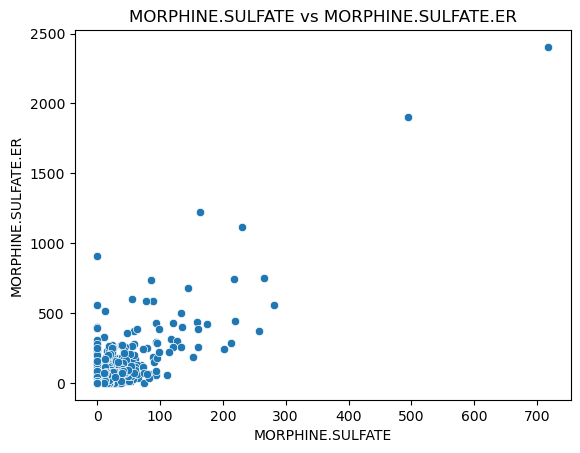

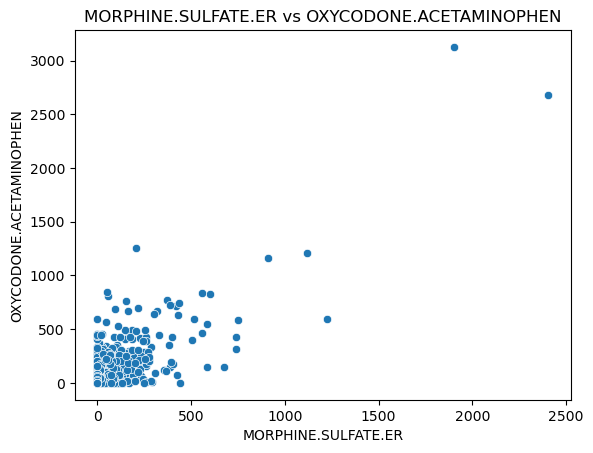

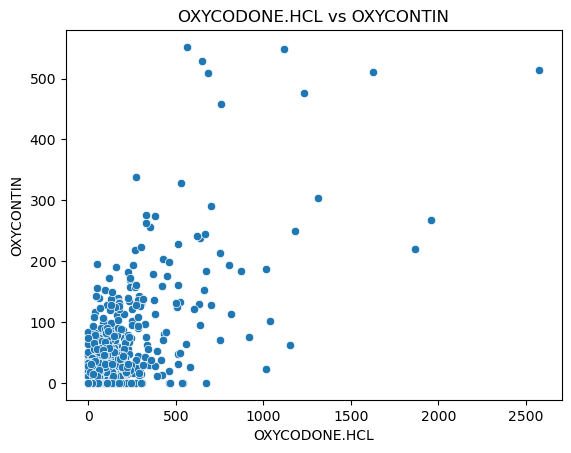

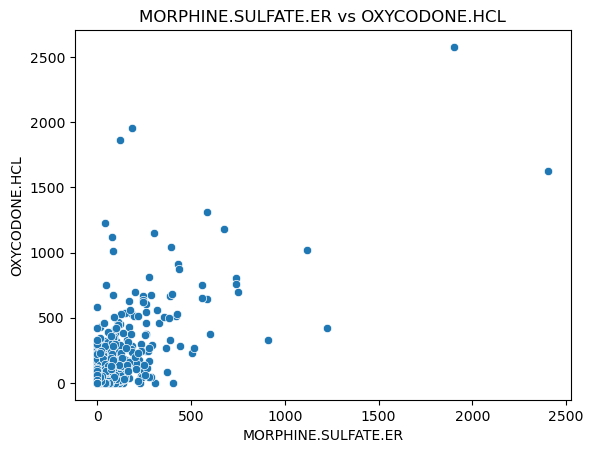

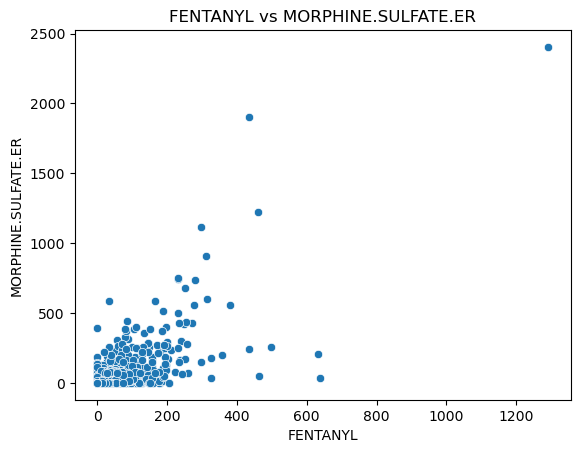

In [37]:
# Create a list of the top 5 correlated pairs
top_pairs = [('MORPHINE.SULFATE', 'MORPHINE.SULFATE.ER'),
             ('MORPHINE.SULFATE.ER', 'OXYCODONE.ACETAMINOPHEN'),
             ('OXYCODONE.HCL', 'OXYCONTIN'),
             ('MORPHINE.SULFATE.ER', 'OXYCODONE.HCL'),
             ('FENTANYL', 'MORPHINE.SULFATE.ER')]

# Create a scatter plot for each pair
for pair in top_pairs:
    # Create a new dataframe with the two opioids
    df = new_prescribers[list(pair)]
    # Set the plot title to the name of the opioids
    plot_title = f"{pair[0]} vs {pair[1]}"
    # Create the scatter plot
    sns.scatterplot(data=df, x=pair[0], y=pair[1])
    # Add a title
    plt.title(plot_title)
    # Show the plot
    plt.show()

In [38]:
# Create a set of unique opioids
unique_opioids = set([opioid for pair in top_pairs for opioid in pair])

# Calculate the variance for each opioid and sort in descending order
variances = [(opioid, new_prescribers[opioid].var()) for opioid in unique_opioids]
variances_sorted = sorted(variances, key=lambda x: x[1], reverse=True)

# Print the variances in descending order
for opioid, var in variances_sorted:
    print(f"Variance of {opioid}: {var:.2f}")

Variance of OXYCODONE.HCL: 2240.43
Variance of OXYCODONE.ACETAMINOPHEN: 2159.89
Variance of MORPHINE.SULFATE.ER: 1020.67
Variance of FENTANYL: 417.47
Variance of OXYCONTIN: 234.37
Variance of MORPHINE.SULFATE: 82.59


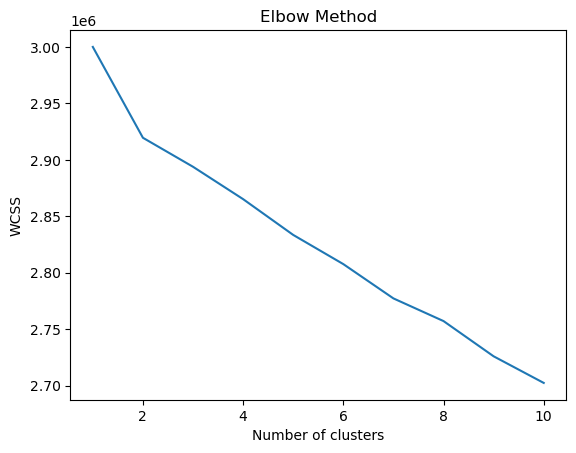

In [39]:
# import necessary libraries 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


prescribers = new_prescribers[['Specialty', 'OXYCODONE.ACETAMINOPHEN','FENTANYL','HYDROMORPHONE.HCL','HYDROCODONE.ACETAMINOPHEN','MORPHINE.SULFATE','METHADONE.HCL', 'MORPHINE.SULFATE.ER','OXYCODONE.HCL','ACETAMINOPHEN.CODEINE', 'TRAMADOL.HCL','OXYCONTIN']]
prescribers_encoded = pd.get_dummies(prescribers, columns=['Specialty'])
scaler = StandardScaler()
prescribers_scaled = scaler.fit_transform(prescribers_encoded)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(prescribers_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(prescribers_scaled)
new_prescribers['cluster'] = kmeans.labels_
cluster_summary = new_prescribers.groupby('cluster').mean()


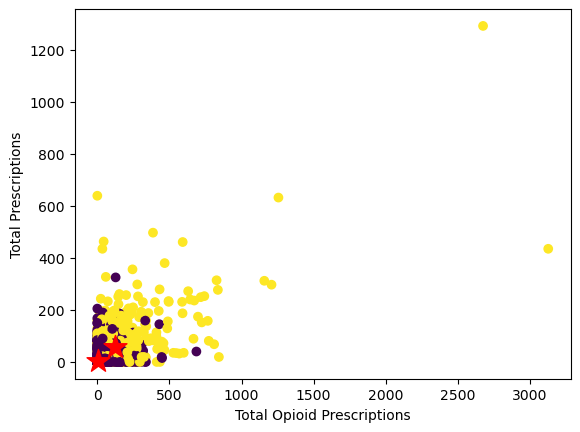

Specialty: Addiction Medicine
NPI: 1912202458
Distance to Centroid: 1219.6055692138955
State: FL
Gender: M
Credentials: M.D.

Specialty: Interventional Pain Management
NPI: 1831150630
Distance to Centroid: 5599.409832982692
State: FL
Gender: M
Credentials: M.D.

Specialty: Pain Management
NPI: 1053392571
Distance to Centroid: 2209.7991029957398
State: IN
Gender: M
Credentials: MD

Specialty: Anesthesiology
NPI: 1215199609
Distance to Centroid: 1946.927386355921
State: FL
Gender: M
Credentials: DO

Specialty: Physical Medicine and Rehabilitation
NPI: 1750364121
Distance to Centroid: 6436.64394433462
State: LA
Gender: M
Credentials: MD



In [40]:
# This is the clustering analysis to find opioid prescribers who are most at risk to over prescribe 

X = new_prescribers.drop(['NPI','Gender','State','Credentials','Specialty','Opioid.Prescriber'], axis=1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
new_prescribers['cluster'] = labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('Total Opioid Prescriptions')
plt.ylabel('Total Prescriptions')
plt.show()

# calculate the distance to centroid for each prescriber
distances = kmeans.transform(X)
new_prescribers['distance_to_centroid'] = distances.min(axis=1)

# calculate the mean distance for each specialty
mean_distances = new_prescribers.groupby('Specialty')['distance_to_centroid'].mean()

# find the top 5 specialties with the highest mean distance
top_5_specialties = mean_distances.nlargest(5).index.tolist()

# find the top 1 prescriber from each of the top 5 specialties
top_prescribers = []
for specialty in top_5_specialties:
    specialty_df = new_prescribers[new_prescribers['Specialty'] == specialty]
    top_prescriber = specialty_df.nlargest(1, 'distance_to_centroid')
    top_prescribers.append(top_prescriber)

# print the top prescribers for each of the top 5 specialties
for prescriber in top_prescribers:
    print("Specialty:", prescriber['Specialty'].values[0])
    print("NPI:", prescriber['NPI'].values[0])
    print("Distance to Centroid:", prescriber['distance_to_centroid'].values[0])
    print("State:", prescriber['State'].values[0])
    print("Gender:", prescriber['Gender'].values[0])
    print("Credentials:", prescriber['Credentials'].values[0])
    print()